In [1]:
import tensorflow as tf
import keras
from keras.callbacks import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *

Using TensorFlow backend.


In [2]:
traindata = pd.read_csv('sign_mnist_train.csv')

In [3]:
trainlabel=traindata['label'].values

In [4]:
traindata.drop('label',inplace=True,axis=1)
trainimages = traindata.values

In [5]:
trainimages=trainimages.reshape(-1,28,28,1)

In [6]:
testdata = pd.read_csv('sign_mnist_test.csv')

In [7]:
testlabel=testdata['label'].values

In [8]:
testdata.drop('label',inplace=True,axis=1)
testimages = testdata.values

In [9]:
testimages=testimages.reshape(-1,28,28,1)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [21]:
traingen=ImageDataGenerator(rotation_range=20,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,
                  shear_range=0.1,horizontal_flip=True,rescale=1/255.0,validation_split=0.1)

In [22]:
traindata_generator = traingen.flow(trainimages,trainlabel,subset='training')
validationdata_generator = traingen.flow(trainimages,trainlabel,subset='validation')

In [23]:
testgen=ImageDataGenerator(rescale=1/255.0)
testdata_generator = testgen.flow(testimages,testlabel)

In [31]:
model=Sequential([])

model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))


model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(26,activation="softmax"))


In [32]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_9 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10816)             0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 10816)             43264     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2769152   
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)              

In [34]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True
callback=myCallback()

In [35]:
history=model.fit(traindata_generator,epochs=40,validation_data=validationdata_generator,callbacks=[callback])

Epoch 1/40
773/773 [==============================] - 8s 10ms/step - loss: 1.3879 - accuracy: 0.5744 - val_loss: 1.1443 - val_accuracy: 0.5862
Epoch 2/40
773/773 [==============================] - 7s 9ms/step - loss: 0.6672 - accuracy: 0.7841 - val_loss: 0.7049 - val_accuracy: 0.7847
Epoch 3/40
773/773 [==============================] - 7s 9ms/step - loss: 0.4788 - accuracy: 0.8429 - val_loss: 0.4435 - val_accuracy: 0.7038
Epoch 4/40
773/773 [==============================] - 7s 9ms/step - loss: 0.3890 - accuracy: 0.8717 - val_loss: 1.8427 - val_accuracy: 0.6539
Epoch 5/40
773/773 [==============================] - 7s 9ms/step - loss: 0.3816 - accuracy: 0.8714 - val_loss: 0.7952 - val_accuracy: 0.8157
Epoch 6/40
773/773 [==============================] - 7s 9ms/step - loss: 0.3141 - accuracy: 0.8940 - val_loss: 0.5791 - val_accuracy: 0.8572
Epoch 7/40
773/773 [==============================] - 7s 9ms/step - loss: 0.2653 - accuracy: 0.9112 - val_loss: 1.2920 - val_accuracy: 0.7508
Epoch

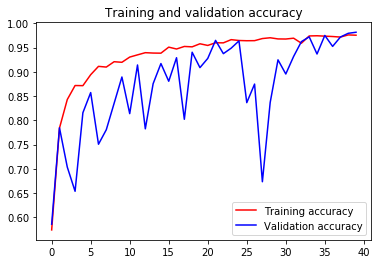

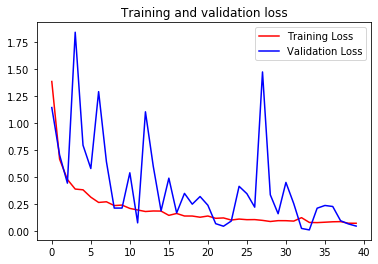

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [37]:
print("test accuracy: "+ str(model.evaluate_generator(testdata_generator)[1]*100))

test accuracy: 97.71332740783691
